In [30]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv("/kaggle/input/breast-cancer/breast-cancer.csv")

In [32]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [33]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [34]:
df.shape

(569, 32)

In [35]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [36]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [37]:
df.duplicated().sum()

0

In [38]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [40]:
df[['radius_mean','radius_mean','radius_mean']]

,radius_mean,radius_mean,radius_mean
0,17.99,17.99,17.99
1,20.57,20.57,20.57
2,19.69,19.69,19.69
3,11.42,11.42,11.42
4,20.29,20.29,20.29
...,...,...,...
564,21.56,21.56,21.56
565,20.13,20.13,20.13
566,16.60,16.60,16.60
567,20.60,20.60,20.60


In [41]:
df[['radius_worst','perimeter_worst','area_worst']]

,radius_worst,perimeter_worst,area_worst
0,25.380,184.60,2019.0
1,24.990,158.80,1956.0
2,23.570,152.50,1709.0
3,14.910,98.87,567.7
4,22.540,152.20,1575.0
...,...,...,...
564,25.450,166.10,2027.0
565,23.690,155.00,1731.0
566,18.980,126.70,1124.0
567,25.740,184.60,1821.0


In [42]:
df['diagnosis'] = df['diagnosis'].map({"M":1, "B":0})
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


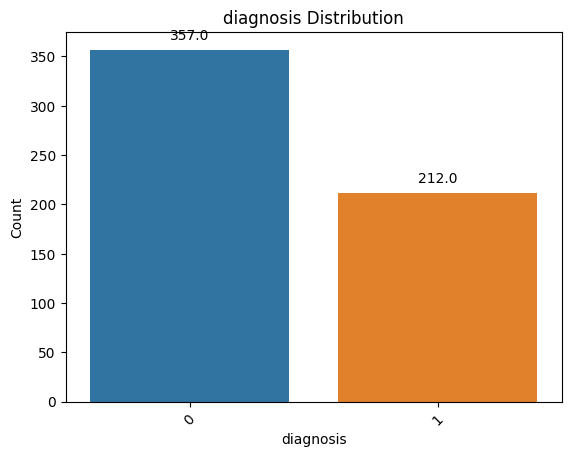

In [43]:
sns.countplot(x='diagnosis', data=df)
plt.title('diagnosis Distribution')
plt.xlabel('diagnosis')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

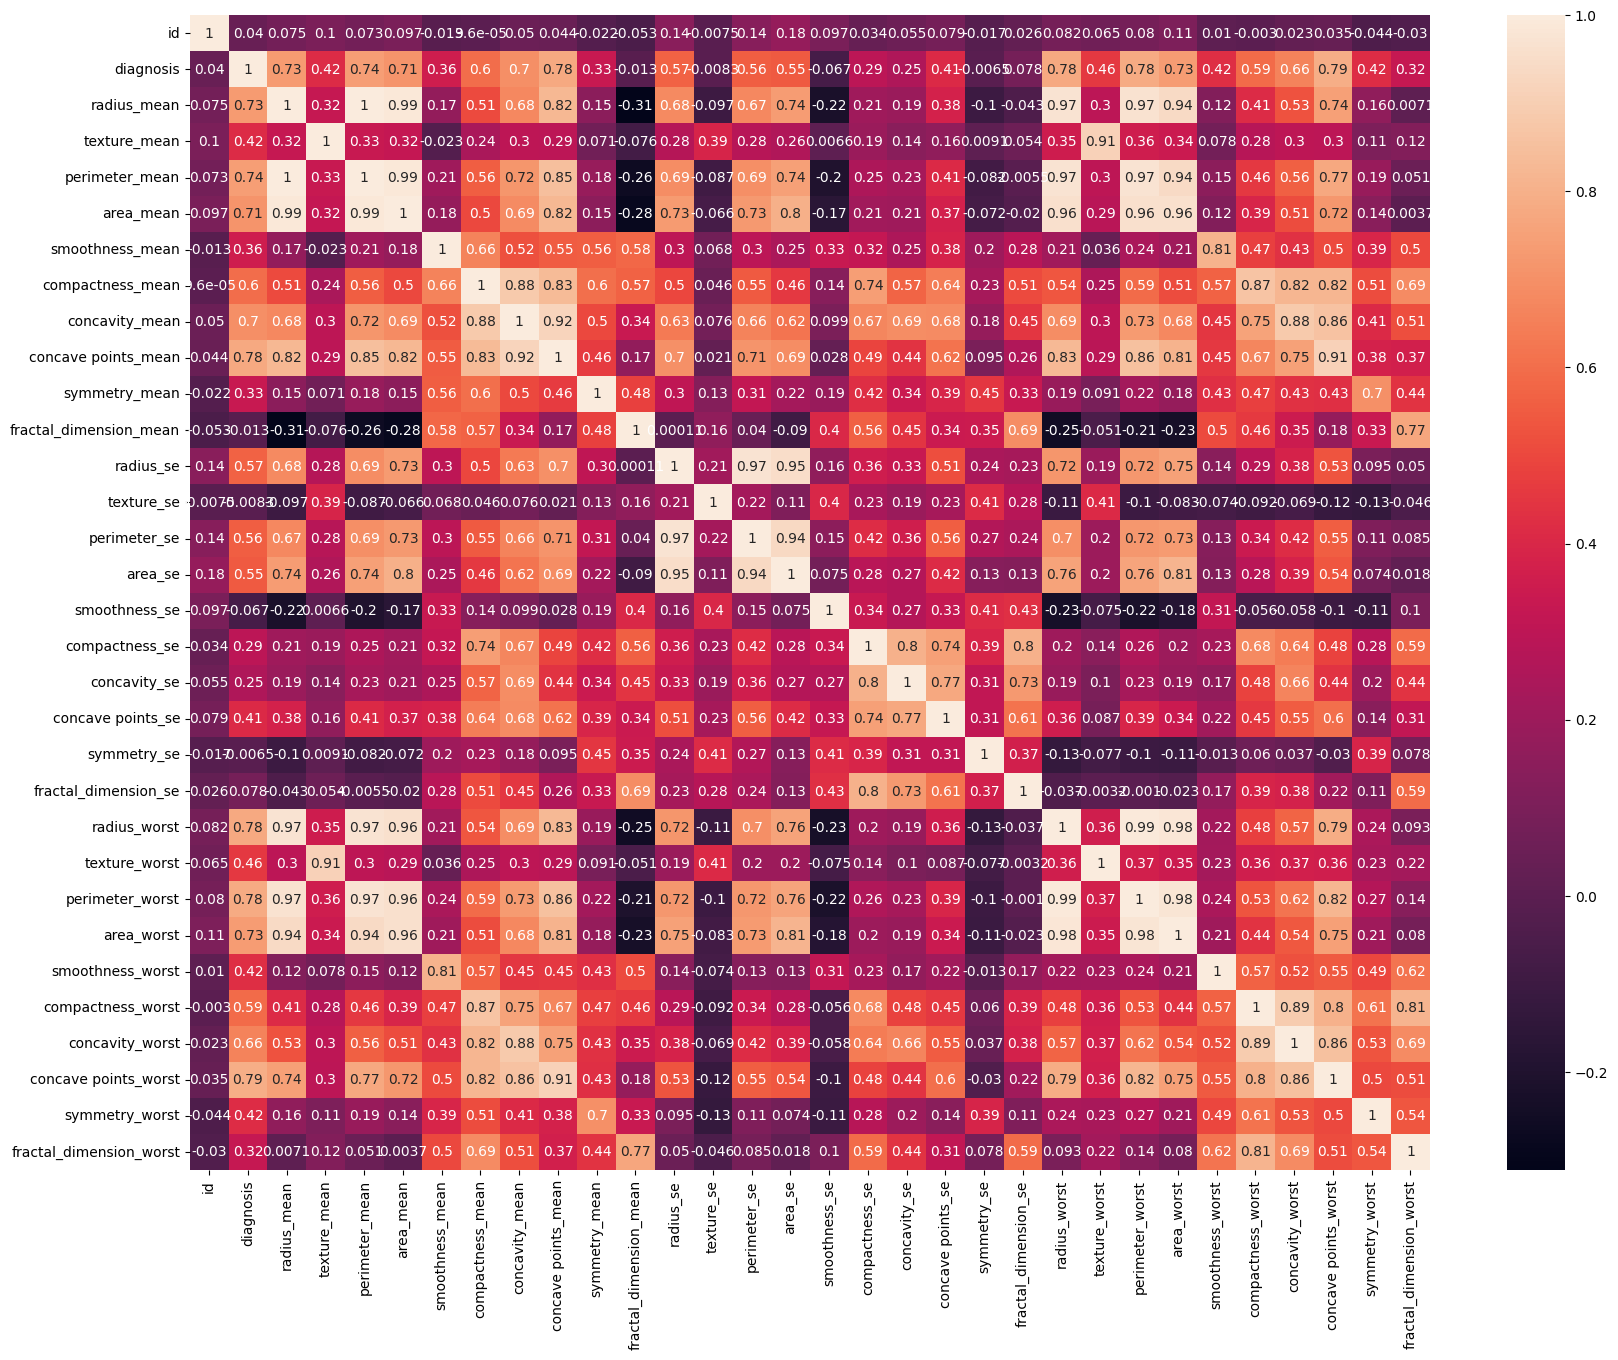

In [44]:
df_temp = df

plt.figure(figsize=(20, 15))
sns.heatmap(df_temp.corr(), annot=True)  # visualizing relationships or patterns in a dataset
plt.show()

In [45]:
X = df.drop('diagnosis',axis=1)
y = df['diagnosis']

In [46]:
from sklearn.preprocessing import  StandardScaler

scl =StandardScaler()
X_scaled = scl.fit_transform(X)

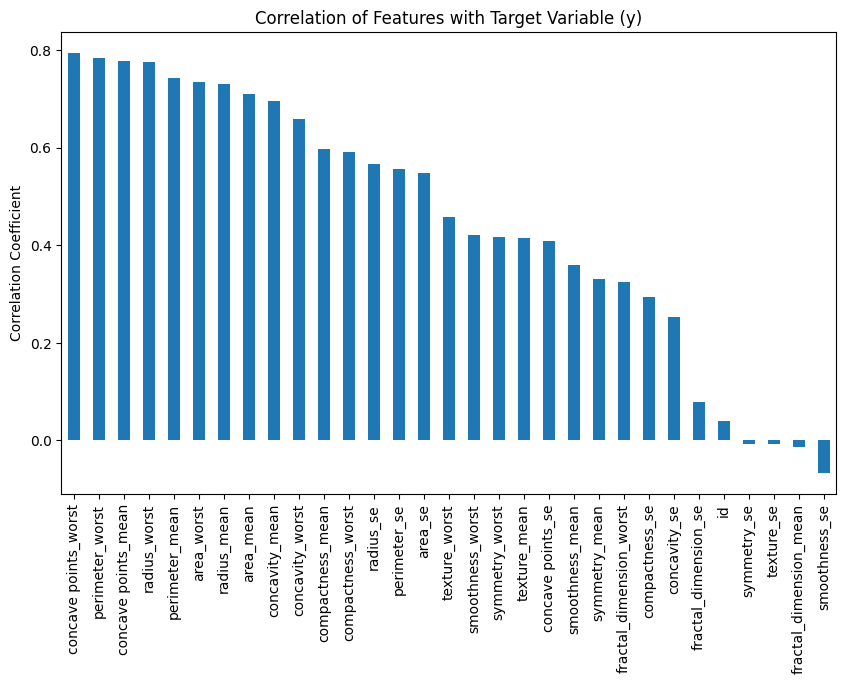

In [47]:
df = pd.concat([X, y], axis=1)
cm = df.corr()
correlation_with_y = cm.iloc[:-1, -1]

# Visualize the correlation
plt.figure(figsize=(10, 6))
correlation_with_y.sort_values(ascending=False).plot(kind='bar')
plt.title('Correlation of Features with Target Variable (y)')
plt.ylabel('Correlation Coefficient')
plt.show()

In [48]:
X = pd.concat([df['concave points_worst'],df['perimeter_worst'],df['concave points_mean'],df['radius_worst'],df['perimeter_mean'],df['area_worst'],df['radius_mean'],df['area_mean'],df['concavity_mean'],df['concavity_worst'], df['compactness_mean'], df['compactness_worst'], df['radius_se'], df['perimeter_se'], df['area_se']],axis=1)
y = df['diagnosis']

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

# **Logistic Regression Model**

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Define specificity_score function
def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

# Assuming you have already split your data into X_train, X_test, y_train, y_test

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Logistic Regression model
model_lr = LogisticRegression(random_state=42, max_iter=1000)
model_lr.fit(X_train_scaled, y_train)

# Make predictions
ypred_lr = model_lr.predict(X_test_scaled)

# Calculate evaluation metrics for Logistic Regression
accuracy_lr = accuracy_score(y_test, ypred_lr)
precision_lr = precision_score(y_test, ypred_lr)
recall_lr = recall_score(y_test, ypred_lr)
f1_lr = f1_score(y_test, ypred_lr)
specificity_lr = specificity_score(y_test, ypred_lr)

# Print evaluation metrics for Logistic Regression
print("Using Logistic Regression:\n")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1 Score: {f1_lr:.4f}")
print(f"Specificity: {specificity_lr:.4f}")


Using Logistic Regression:

Accuracy: 0.9474
Precision: 0.9219
Recall: 0.9365
F1 Score: 0.9291
Specificity: 0.9537


Confusion Matrix:
[[103   5]
 [  4  59]]


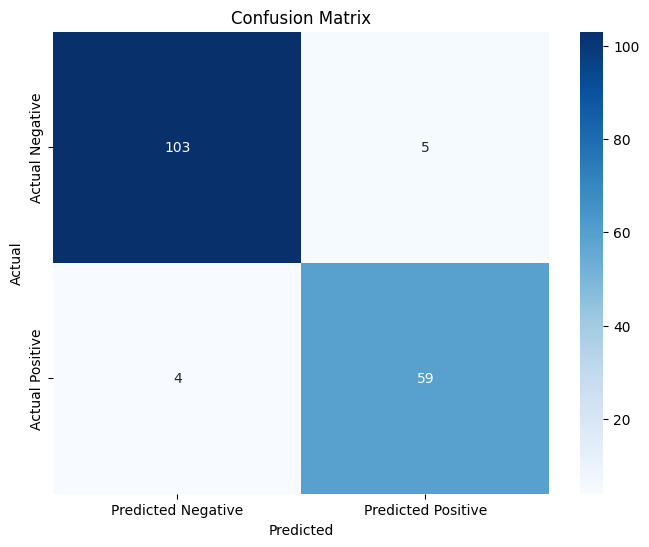

In [51]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, ypred_lr)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Optionally, visualize the confusion matrix using seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# **Random Forest Model**

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Define specificity_score function
def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

# Assuming you have already split your data into X_train, X_test, y_train, y_test

# Initialize and train the Random Forest Classifier model
model_rfc = RandomForestClassifier(random_state=42)
model_rfc.fit(X_train, y_train)

# Make predictions
ypred_rfc = model_rfc.predict(X_test)

# Calculate evaluation metrics for Random Forest Classifier
accuracy_rfc = accuracy_score(y_test, ypred_rfc)
precision_rfc = precision_score(y_test, ypred_rfc)
recall_rfc = recall_score(y_test, ypred_rfc)
f1_rfc = f1_score(y_test, ypred_rfc)
specificity_rfc = specificity_score(y_test, ypred_rfc)

# Print evaluation metrics for Random Forest Classifier
print("\nUsing Random Forest Classifier:\n")
print(f"Accuracy: {accuracy_rfc:.4f}")
print(f"Precision: {precision_rfc:.4f}")
print(f"Recall: {recall_rfc:.4f}")
print(f"F1 Score: {f1_rfc:.4f}")
print(f"Specificity: {specificity_rfc:.4f}")



Using Random Forest Classifier:

Accuracy: 0.9591
Precision: 0.9516
Recall: 0.9365
F1 Score: 0.9440
Specificity: 0.9722


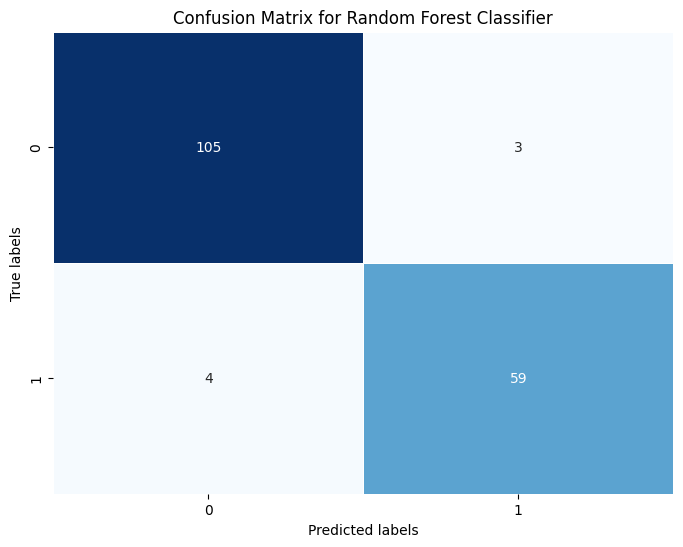

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate confusion matrix
conf_matrix_rfc = confusion_matrix(y_test, ypred_rfc)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rfc, annot=True, cmap="Blues", fmt="d", linewidths=.5, cbar=False)
plt.title("Confusion Matrix for Random Forest Classifier")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()


# **Decision Tree Model**

Using Decision Tree:

Accuracy: 0.9181
Precision: 0.8889
Recall: 0.8889
F1 Score: 0.8889
Specificity: 0.9352
Confusion Matrix:
[[101   7]
 [  7  56]]


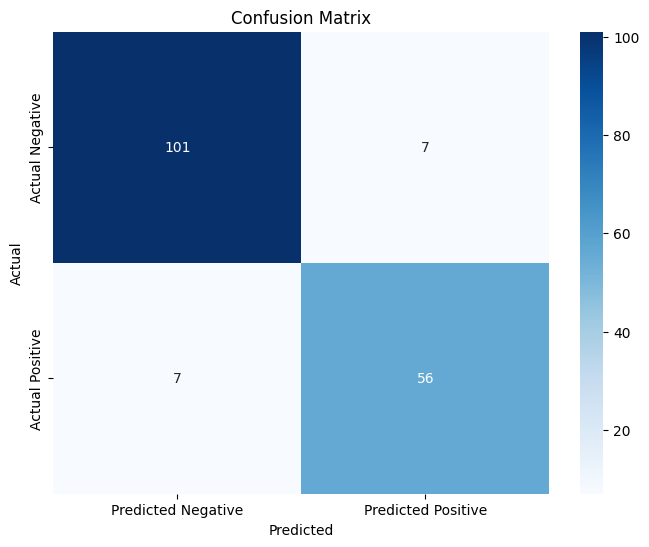

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already split your data into X_train, X_test, y_train, y_test

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Decision Tree model
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train_scaled, y_train)

# Make predictions
ypred_dt = model_dt.predict(X_test_scaled)

# Define specificity_score function
def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

# Calculate evaluation metrics for Decision Tree
accuracy_dt = accuracy_score(y_test, ypred_dt)
precision_dt = precision_score(y_test, ypred_dt)
recall_dt = recall_score(y_test, ypred_dt)
f1_dt = f1_score(y_test, ypred_dt)
specificity_dt = specificity_score(y_test, ypred_dt)

# Print evaluation metrics for Decision Tree
print("Using Decision Tree:\n")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1 Score: {f1_dt:.4f}")
print(f"Specificity: {specificity_dt:.4f}")

# Calculate confusion matrix
conf_matrix_dt = confusion_matrix(y_test, ypred_dt)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix_dt)

# Visualize the confusion matrix using seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


# **Support Vector Machine Model**

Using SVM:

Accuracy: 0.9357
Precision: 0.9333
Recall: 0.8889
F1 Score: 0.9106
Specificity: 0.9630
Confusion Matrix:
[[104   4]
 [  7  56]]


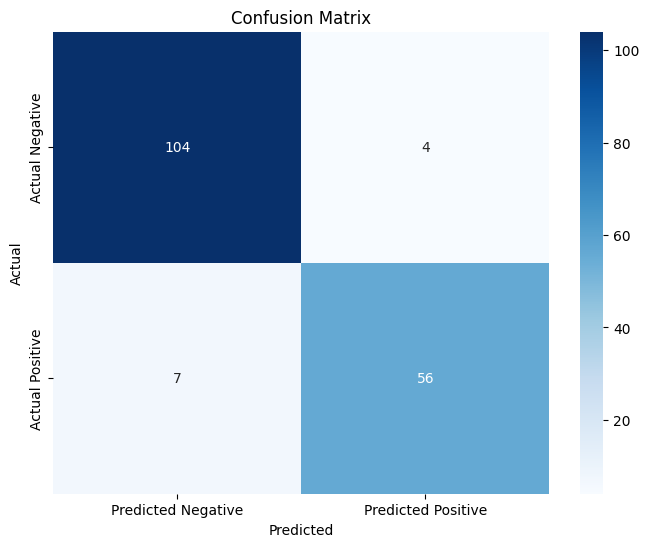

In [55]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already split your data into X_train, X_test, y_train, y_test

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the SVM model
model_svm = SVC(random_state=42)
model_svm.fit(X_train_scaled, y_train)

# Make predictions
ypred_svm = model_svm.predict(X_test_scaled)

# Define specificity_score function
def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

# Calculate evaluation metrics for SVM
accuracy_svm = accuracy_score(y_test, ypred_svm)
precision_svm = precision_score(y_test, ypred_svm)
recall_svm = recall_score(y_test, ypred_svm)
f1_svm = f1_score(y_test, ypred_svm)
specificity_svm = specificity_score(y_test, ypred_svm)

# Print evaluation metrics for SVM
print("Using SVM:\n")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"F1 Score: {f1_svm:.4f}")
print(f"Specificity: {specificity_svm:.4f}")

# Calculate confusion matrix
conf_matrix_svm = confusion_matrix(y_test, ypred_svm)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix_svm)

# Visualize the confusion matrix using seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


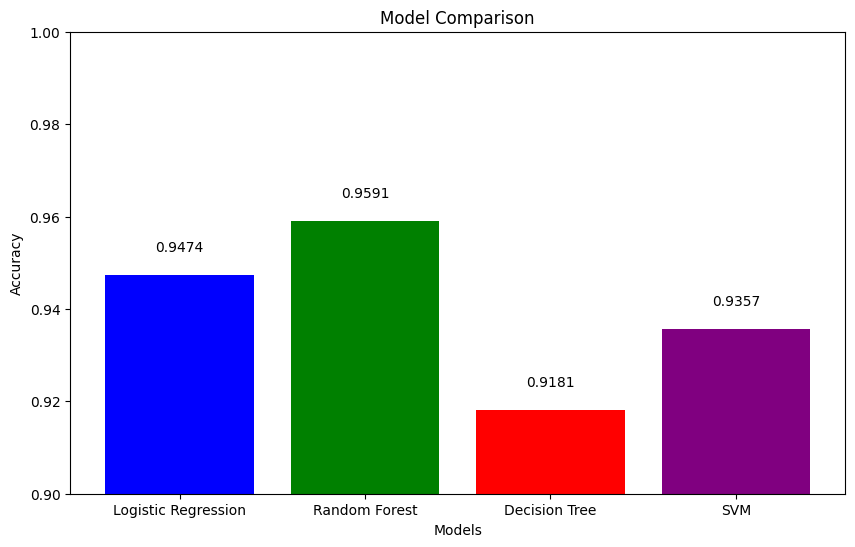

In [56]:
import matplotlib.pyplot as plt

# Assuming you have already calculated the accuracies for each model
accuracies = [accuracy_lr, accuracy_rfc, accuracy_dt, accuracy_svm]
models = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'SVM']

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.ylim(0.9, 1)  # Setting y-axis limit for better visualization
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.005, f'{accuracy:.4f}', ha='center')
plt.show()


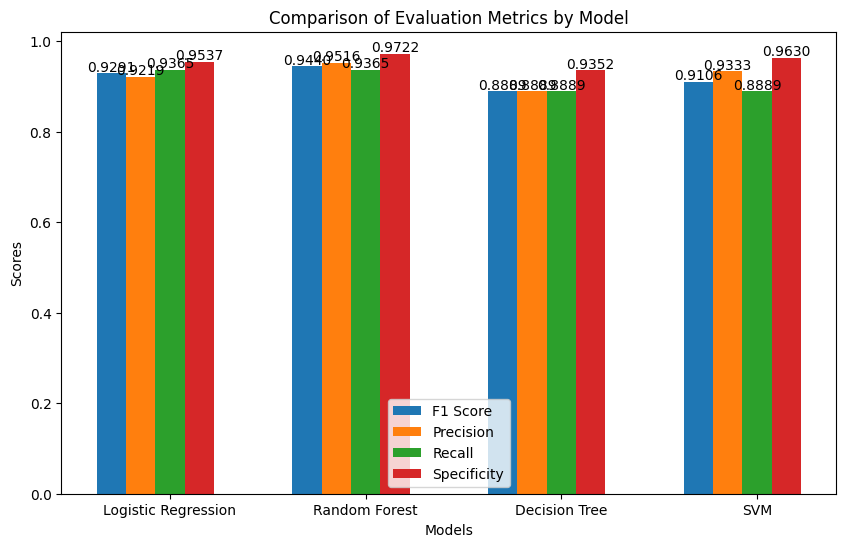

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Data for the plot
models = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'SVM']
metrics = ['F1 Score', 'Precision', 'Recall', 'Specificity']
scores = np.array([[f1_lr, precision_lr, recall_lr, specificity_lr],
                   [f1_rfc, precision_rfc, recall_rfc, specificity_rfc],
                   [f1_dt, precision_dt, recall_dt, specificity_dt],
                   [f1_svm, precision_svm, recall_svm, specificity_svm]])
accuracies = [accuracy_lr, accuracy_rfc, accuracy_dt, accuracy_svm]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.15
index = np.arange(len(models))

for i, metric in enumerate(metrics):
    ax.bar(index + (i * bar_width), scores[:, i], bar_width, label=metric)

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Evaluation Metrics by Model')
ax.set_xticks(index + (len(metrics) / 2 * bar_width))
ax.set_xticklabels(models)
ax.legend()

# Displaying the accuracy scores above the bars for better visualization
for i in range(len(models)):
    for j in range(len(metrics)):
        ax.text(i + j * bar_width, scores[i, j] + 0.005, f'{scores[i, j]:.4f}', ha='center')

plt.show()
